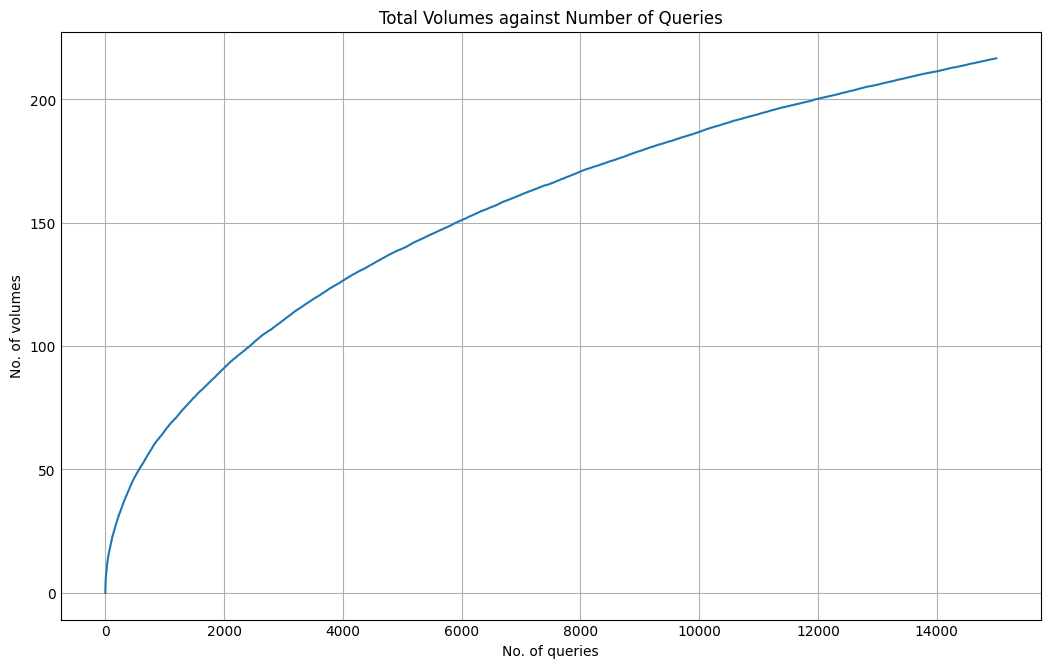

In [1]:
#overcoverwithoutreplacement

import math
import random 
import matplotlib.pyplot as plt 

RSEmax = 256

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**i == 1:
                    if start - j + 2 ** i - 1 >= end:
                        return (start - j, start - j + 2 ** i - 1)
                    else:
                        break

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 3*RSEmax - (math.log(RSEmax, 2) + 2)
no_of_runs = 200
no_of_queries = 15000
def overcover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = overcover(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
            arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = overcover_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()